# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

#### Carregar os pacotes e a base de gorjetas ####

In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import patsy

# Carregar a base de dados de gorjetas
tips = sns.load_dataset("tips")

# Criar uma nova coluna para a conta líquida (sem gorjeta)
tips['net_bill'] = tips['total_bill'] - tips['tip']

#### 1. Criar a matriz de design e a matriz y usando Patsy ####

In [3]:
# Criar a matriz de design com Patsy
y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill', data=tips, return_type='dataframe')

# Ajustar o modelo de regressão OLS
model = sm.OLS(y, X).fit()

# Exibir o resumo do modelo
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Mon, 28 Oct 2024   Prob (F-statistic):           2.64e-20
Time:                        19:48:31   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.

#### 2. Remover as variáveis não significantes ####

In [5]:
# Criar a matriz de design sem variáveis não significantes
y, X = patsy.dmatrices('tip ~ net_bill + smoker', data=tips, return_type='dataframe')

# Ajustar o modelo de regressão OLS
model_adj = sm.OLS(y, X).fit()

# Exibir o resumo do modelo ajustado
print(model_adj.summary())


                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.67
Date:                Mon, 28 Oct 2024   Prob (F-statistic):           4.56e-22
Time:                        19:48:34   Log-Likelihood:                -375.20
No. Observations:                 244   AIC:                             756.4
Df Residuals:                     241   BIC:                             766.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.2318      0.200      6.172   

#### 3. Gráfico de resíduos em função de net_bill ####

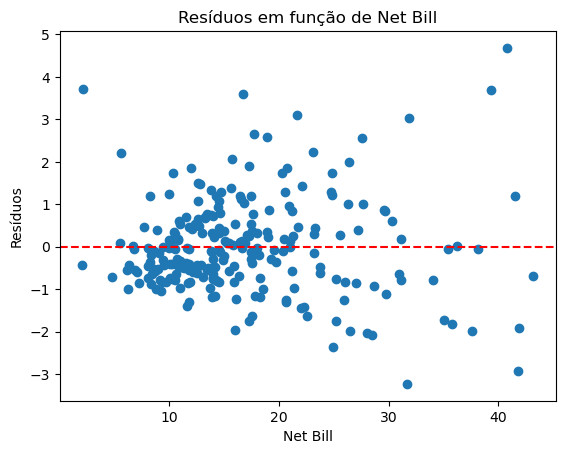

In [7]:
# Obter os resíduos
residuals = model_adj.resid

# Plotar os resíduos em função de net_bill
plt.scatter(tips['net_bill'], residuals)
plt.xlabel('Net Bill')
plt.ylabel('Resíduos')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Resíduos em função de Net Bill')
plt.show()


#### 4. Testar transformações em net_bill (log e polinômio) ####

##### Modelo com log de net_bill #####

In [9]:
# Criar a matriz de design com log de net_bill
y, X_log = patsy.dmatrices('tip ~ np.log(net_bill) + smoker', data=tips, return_type='dataframe')

# Ajustar o modelo de regressão OLS
model_log = sm.OLS(y, X_log).fit()

# Exibir o resumo do modelo com log
print(model_log.summary())


                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     50.34
Date:                Mon, 28 Oct 2024   Prob (F-statistic):           5.38e-19
Time:                        19:48:41   Log-Likelihood:                -382.36
No. Observations:                 244   AIC:                             770.7
Df Residuals:                     241   BIC:                             781.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2890      0.445  

##### Modelo com polinômio de segundo grau em net_bill #####

In [11]:
# Criar a matriz de design com polinômio de segundo grau em net_bill
y, X_poly = patsy.dmatrices('tip ~ net_bill + I(net_bill**2) + smoker', data=tips, return_type='dataframe')

# Ajustar o modelo de regressão OLS
model_poly = sm.OLS(y, X_poly).fit()

# Exibir o resumo do modelo polinomial
print(model_poly.summary())


                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     40.55
Date:                Mon, 28 Oct 2024   Prob (F-statistic):           3.11e-21
Time:                        19:48:44   Log-Likelihood:                -374.93
No. Observations:                 244   AIC:                             757.9
Df Residuals:                     240   BIC:                             771.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.0129      0.361  

O modelo polinomial é superior porque apresenta:

Maior R² ajustado, o que significa que ele explica mais da variabilidade no valor da gorjeta.
Menores AIC e BIC, indicando que é um modelo mais parcimonioso.
Melhor distribuição dos resíduos, sugerindo que ele se ajusta melhor aos dados.
Portanto, com base nessas métricas, o modelo polinomial de segundo grau em net_bill deve ser considerado o melhor entre os dois.

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [17]:
import seaborn as sns
import pandas as pd
import numpy as np
import patsy
from patsy import dmatrices
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Carregar a base de gorjetas (tips)
tips = sns.load_dataset("tips")

# Criar uma nova variável net_bill (valor total da conta menos gorjeta)
tips['net_bill'] = tips['total_bill'] - tips['tip']

# 1. Criar a matriz de design (X) e a matriz de resposta (y) usando o Patsy
formula = 'np.log(tip) ~ sex + smoker + size + net_bill'
y, X = dmatrices(formula, data=tips, return_type='dataframe')



In [21]:
# 2. Ajustar o modelo de regressão
modelo = sm.OLS(y, X).fit()

# Exibir os resultados do modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     31.95
Date:                Mon, 28 Oct 2024   Prob (F-statistic):           2.49e-21
Time:                        19:53:24   Log-Likelihood:                -90.998
No. Observations:                 244   AIC:                             192.0
Df Residuals:                     239   BIC:                             209.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.3372      0.076      4.457

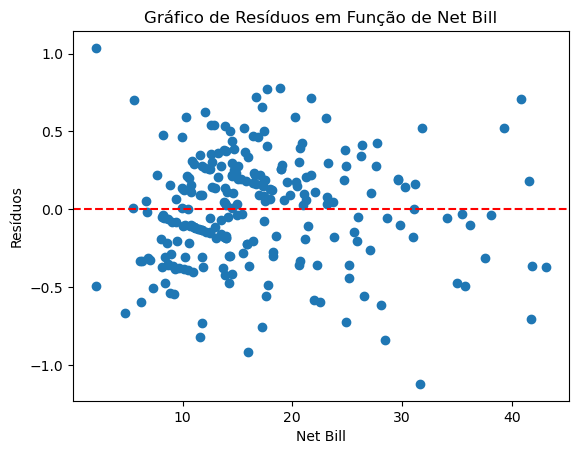

In [23]:
# 3. Ver o gráfico de resíduos em função de net_bill
residuos = modelo.resid
plt.scatter(tips['net_bill'], residuos)
plt.xlabel('Net Bill')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos em Função de Net Bill')
plt.axhline(0, color='red', linestyle='--')
plt.show()

In [25]:
# 4. Testar a transformação de net_bill no log e em polinômios
# Log de net_bill
tips['log_net_bill'] = np.log(tips['net_bill'])

# Criar fórmula com log de net_bill
formula_log = 'np.log(tip) ~ sex + smoker + size + log_net_bill'
y_log, X_log = dmatrices(formula_log, data=tips, return_type='dataframe')

# Ajustar o modelo com log de net_bill
modelo_log = sm.OLS(y_log, X_log).fit()
print(modelo_log.summary())

# Polinômio de segundo grau para net_bill
tips['net_bill_squared'] = tips['net_bill'] ** 2

# Criar fórmula com polinômio de segundo grau
formula_poly = 'np.log(tip) ~ sex + smoker + size + net_bill + I(net_bill ** 2)'
y_poly, X_poly = dmatrices(formula_poly, data=tips, return_type='dataframe')

# Ajustar o modelo com polinômio de segundo grau
modelo_poly = sm.OLS(y_poly, X_poly).fit()
print(modelo_poly.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     33.33
Date:                Mon, 28 Oct 2024   Prob (F-statistic):           4.31e-22
Time:                        19:54:26   Log-Likelihood:                -89.179
No. Observations:                 244   AIC:                             188.4
Df Residuals:                     239   BIC:                             205.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.3312      0.141     -2.353

In [39]:
# 5. Calcular o R² na escala original de tip para o melhor modelo
# Prever os valores de np.log(tip)
y_pred_log = modelo_log.predict(X_log)

# Converter as previsões para a escala original
y_pred_log_original = np.exp(y_pred_log)

# Calcular os resíduos
residuals_log = tips['tip'] - y_pred_log_original

# Calcular SSR, SST e R² ajustado
SSR_log = np.sum(residuals_log**2)
SST_log = np.sum((tips['tip'] - np.mean(tips['tip']))**2)
R2_adjusted_log = 1 - (SSR_log/SST_log * (len(tips)-1)/(len(tips)-X_log.shape[1]-1))

print("R² ajustado do modelo logarítmico:", R2_adjusted_log)

R² ajustado do modelo logarítmico: 0.32818330369135507


### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [42]:
# Importar as bibliotecas necessárias
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Carregar a base de dados
dados = pd.read_csv('previsao_de_renda.csv')

# Exibir as primeiras linhas e informações sobre o dataset
print(dados.head())
print(dados.info())

# Passo 1: Regressão Linear Simples com 'renda' como variável dependente e 'tempo_emprego' como variável independente
# Remover linhas com valores ausentes em 'renda' e 'tempo_emprego' para este modelo
dados_simples = dados[['renda', 'tempo_emprego']].dropna()

# Definir variáveis independentes (predictor) e dependentes (response)
X_simples = dados_simples['tempo_emprego']
y_simples = dados_simples['renda']

# Adicionar uma constante ao modelo (termo de intercepto)
X_simples = sm.add_constant(X_simples)

# Ajustar o modelo de regressão linear simples
modelo_simples = sm.OLS(y_simples, X_simples).fit()
print("Resultados da Regressão Linear Simples:\n", modelo_simples.summary())

   Unnamed: 0    data_ref  id_cliente sexo  posse_de_veiculo  posse_de_imovel  \
0           0  2015-01-01       15056    F             False             True   
1           1  2015-01-01        9968    M              True             True   
2           2  2015-01-01        4312    F              True             True   
3           3  2015-01-01       10639    F             False             True   
4           4  2015-01-01        7064    M              True            False   

   qtd_filhos        tipo_renda           educacao estado_civil  \
0           0        Empresário         Secundário     Solteiro   
1           0       Assalariado  Superior completo       Casado   
2           0        Empresário  Superior completo       Casado   
3           1  Servidor público  Superior completo       Casado   
4           0       Assalariado         Secundário     Solteiro   

  tipo_residencia  idade  tempo_emprego  qt_pessoas_residencia    renda  
0            Casa     26       6.602

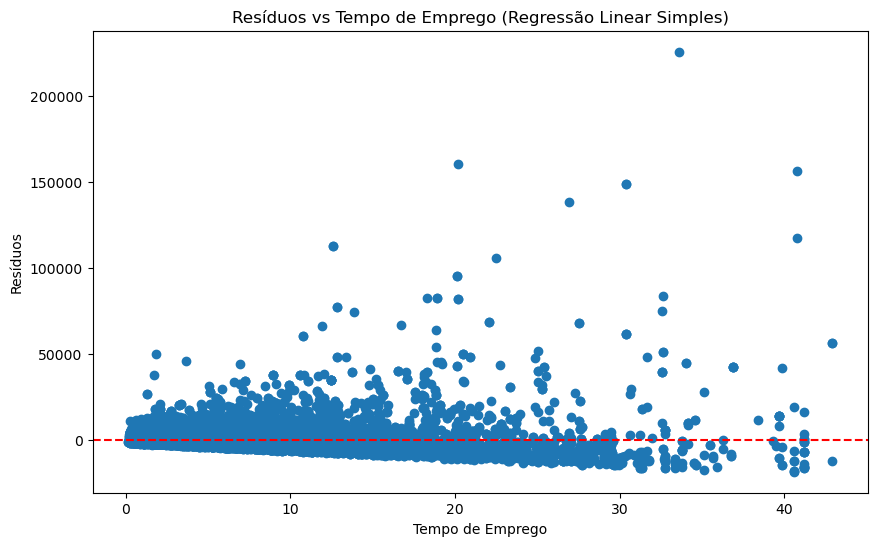

In [44]:
# Passo 2: Análise de Resíduos para Regressão Linear Simples
# Plotar os resíduos
plt.figure(figsize=(10, 6))
plt.scatter(X_simples['tempo_emprego'], modelo_simples.resid)
plt.xlabel('Tempo de Emprego')
plt.ylabel('Resíduos')
plt.title('Resíduos vs Tempo de Emprego (Regressão Linear Simples)')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

Resultados da Regressão com Log(renda):
                             OLS Regression Results                            
Dep. Variable:              log_renda   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     2564.
Date:                Mon, 28 Oct 2024   Prob (F-statistic):               0.00
Time:                        20:25:41   Log-Likelihood:                -15150.
No. Observations:               12427   AIC:                         3.030e+04
Df Residuals:                   12425   BIC:                         3.032e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const

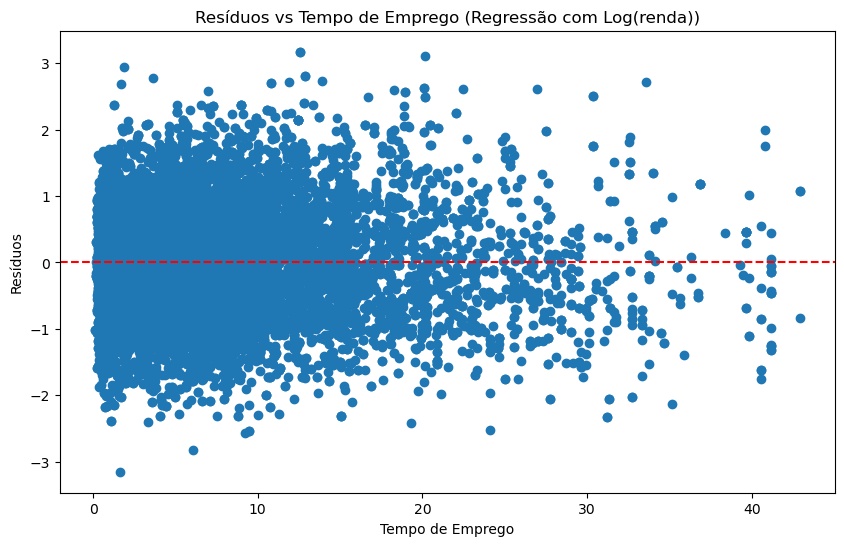


Resultados da Regressão Linear com Termo Quadrático:
                             OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1116.
Date:                Mon, 28 Oct 2024   Prob (F-statistic):               0.00
Time:                        20:25:41   Log-Likelihood:            -1.2960e+05
No. Observations:               12427   AIC:                         2.592e+05
Df Residuals:                   12424   BIC:                         2.592e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

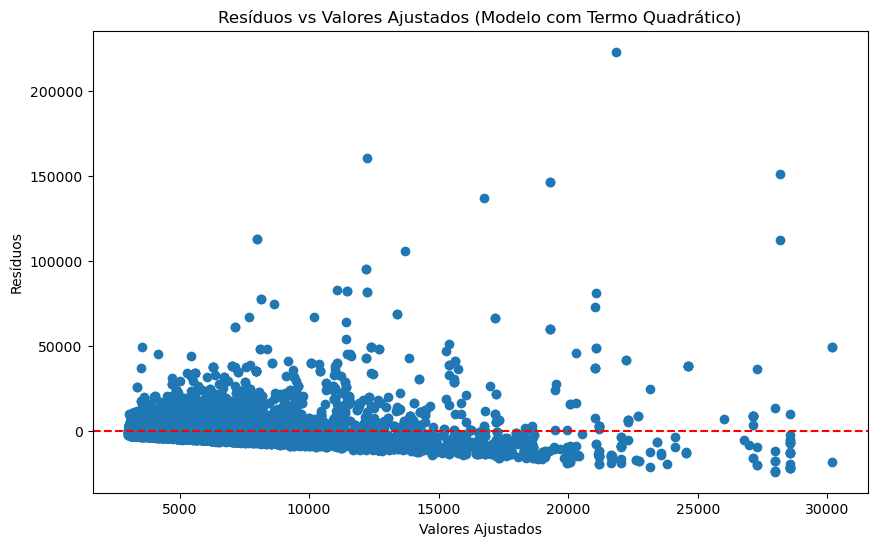

R² (Modelo Linear Simples): 0.14823474099481693
R² (Modelo com Log(renda)): 0.1710846136093096
R² (Modelo com Termo Quadrático): 0.15232466816796109


In [46]:
# Passo 3: Melhorando o Modelo
# Transformação Logarítmica em 'renda'
dados_simples['log_renda'] = np.log(dados_simples['renda'])

# Regressão Linear com a variável dependente como log(renda) e tempo_emprego como explicativa
X_log = sm.add_constant(dados_simples['tempo_emprego'])  # Adicionar o intercepto
y_log = dados_simples['log_renda']

# Ajustar o modelo com log(renda)
modelo_log = sm.OLS(y_log, X_log).fit()
print("Resultados da Regressão com Log(renda):\n", modelo_log.summary())

# Análise de Resíduos para o modelo com log(renda)
plt.figure(figsize=(10, 6))
plt.scatter(dados_simples['tempo_emprego'], modelo_log.resid)
plt.xlabel('Tempo de Emprego')
plt.ylabel('Resíduos')
plt.title('Resíduos vs Tempo de Emprego (Regressão com Log(renda))')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Adicionar Termo Quadrático para 'tempo_emprego'
dados_simples['tempo_emprego_2'] = dados_simples['tempo_emprego'] ** 2

# Definir variáveis para o modelo com termo quadrático
X_quad = sm.add_constant(dados_simples[['tempo_emprego', 'tempo_emprego_2']])
y_quad = dados_simples['renda']

# Ajustar o modelo com termo quadrático
modelo_quad = sm.OLS(y_quad, X_quad).fit()
print("\nResultados da Regressão Linear com Termo Quadrático:\n", modelo_quad.summary())

# Análise de Resíduos para o modelo com termo quadrático
plt.figure(figsize=(10, 6))
plt.scatter(modelo_quad.fittedvalues, modelo_quad.resid)
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.title('Resíduos vs Valores Ajustados (Modelo com Termo Quadrático)')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Comparar R² dos modelos
print(f"R² (Modelo Linear Simples): {modelo_simples.rsquared}")
print(f"R² (Modelo com Log(renda)): {modelo_log.rsquared}")
print(f"R² (Modelo com Termo Quadrático): {modelo_quad.rsquared}")

Resultados da Regressão com Log(renda):
                             OLS Regression Results                            
Dep. Variable:              log_renda   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     2564.
Date:                Mon, 28 Oct 2024   Prob (F-statistic):               0.00
Time:                        20:26:05   Log-Likelihood:                -15150.
No. Observations:               12427   AIC:                         3.030e+04
Df Residuals:                   12425   BIC:                         3.032e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const

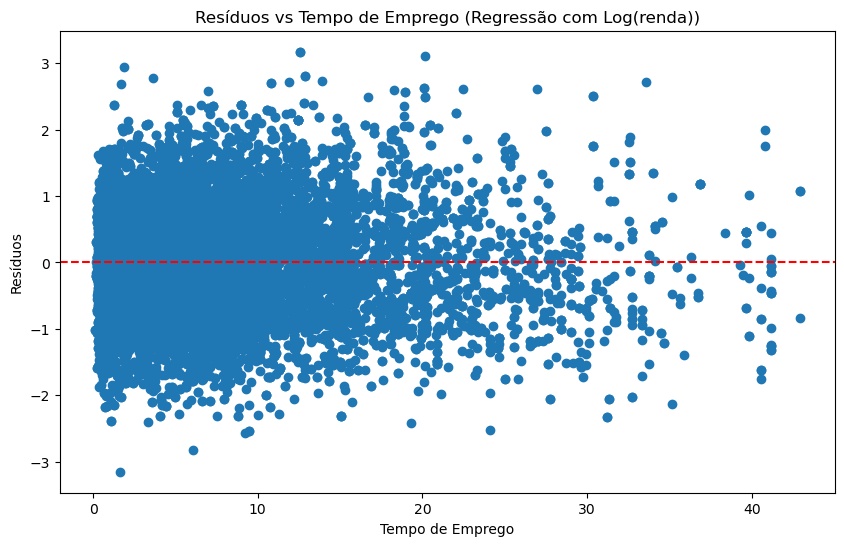


Interpretação dos Parâmetros:
A constante do modelo é 7.8384, o que indica o valor base de log(renda) quando tempo_emprego é zero.
O coeficiente de tempo_emprego é 0.0554, indicando que um ano adicional de emprego aumenta a renda em aproximadamente 5.54%.

R² (Modelo com Log(renda)): 0.171


In [50]:
# Passo 4: Regressão Linear Múltipla
# Remover valores ausentes e criar variáveis dummies para variáveis categóricas
#Transformação Logarítmica em 'renda'
dados_simples['log_renda'] = np.log(dados_simples['renda'])

# Definir a variável dependente log(renda) e a explicativa tempo_emprego
X_log = sm.add_constant(dados_simples['tempo_emprego'])  # Adicionar o intercepto
y_log = dados_simples['log_renda']

# Ajustar o modelo com log(renda) como variável dependente
modelo_log = sm.OLS(y_log, X_log).fit()

# Exibir o resumo do modelo ajustado
print("Resultados da Regressão com Log(renda):\n", modelo_log.summary())

# Passo 2: Análise de Resíduos
plt.figure(figsize=(10, 6))
plt.scatter(dados_simples['tempo_emprego'], modelo_log.resid)
plt.xlabel('Tempo de Emprego')
plt.ylabel('Resíduos')
plt.title('Resíduos vs Tempo de Emprego (Regressão com Log(renda))')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Interpretação dos coeficientes
constante = modelo_log.params['const']
coef_tempo_emprego = modelo_log.params['tempo_emprego']
print(f"\nInterpretação dos Parâmetros:")
print(f"A constante do modelo é {constante:.4f}, o que indica o valor base de log(renda) quando tempo_emprego é zero.")
print(f"O coeficiente de tempo_emprego é {coef_tempo_emprego:.4f}, indicando que um ano adicional de emprego aumenta a renda em aproximadamente {coef_tempo_emprego * 100:.2f}%.")

# Comparação de R² dos modelos (caso você tenha outros modelos para comparação)
# Neste exemplo, estamos apenas imprimindo o R² do modelo com log(renda)
print(f"\nR² (Modelo com Log(renda)): {modelo_log.rsquared:.3f}")


In [52]:
# Passo 5: Remover variáveis não significantes e ajustar novamente o modelo
# Filtrar as variáveis com valores de p abaixo de 0,05

from sklearn.metrics import r2_score

# Obter as previsões do modelo na escala logarítmica
y_log_pred = modelo_log.predict(X_log)

# Converter as previsões de volta à escala original usando exponencial
y_pred_original = np.exp(y_log_pred)

# Calcular o R² na escala original
r2_original_scale = r2_score(dados_simples['renda'], y_pred_original)

print(f"R² do modelo final na escala original (sem log): {r2_original_scale:.3f}")

# Comparar com o R² do modelo do item 1 (Modelo Linear Simples)
# Suponha que 'r2_modelo_simples' seja o R² do modelo linear simples ajustado no item 1
# (caso contrário, substitua com o valor apropriado)
r2_modelo_simples = modelo_simples.rsquared  # Certifique-se de que o modelo simples foi definido anteriormente
print(f"R² do Modelo Linear Simples (item 1): {r2_modelo_simples:.3f}")

# Comparação
if r2_original_scale > r2_modelo_simples:
    print("O modelo final (com log) tem um melhor coeficiente de determinação na escala original.")
else:
    print("O modelo linear simples (item 1) tem um melhor coeficiente de determinação.")


R² do modelo final na escala original (sem log): 0.090
R² do Modelo Linear Simples (item 1): 0.148
O modelo linear simples (item 1) tem um melhor coeficiente de determinação.
